In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
# import os
# file_path ='/content/Datasets/Advertising.csv'

# if os.path.exists(file_path):
#   print('File found at: ', {file_path})
# else:
#   print('File does not exist', {file_path})

In [ ]:
# df = pd.read_csv('/content/Datasets/Advertising.csv')

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>


# **Doing EDA of the Dataset**

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From above analysis we can see that data is already cleaned and have no null values, so we can proceed with the Linear Regression

### Visulizing Relationship between variables

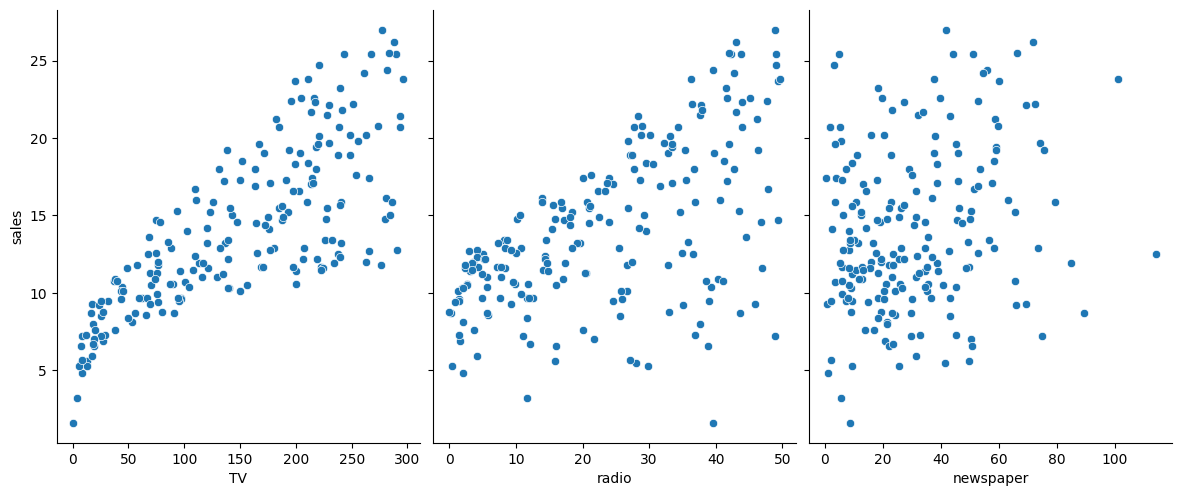

In [ ]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV', 'radio','newspaper'],y_vars='sales',height=5,aspect=0.8,kind='scatter')
plt.show()

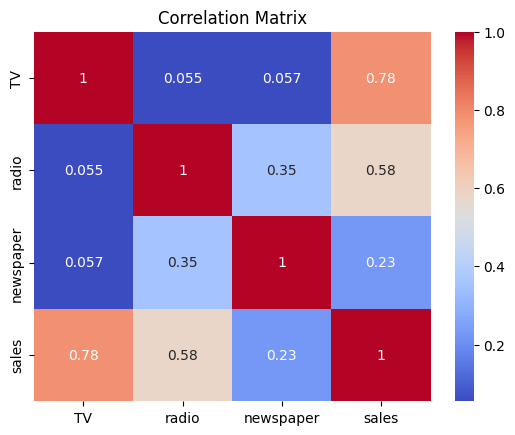

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Starting Linear Regression

In [15]:
# Preparing Data
X=df[['TV','radio','newspaper']]       #features
y=df[['sales']]                   #Target Variable

# Splitting into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)             #training Linear Model

LinearRegression()

In [16]:
# Evaluating Model
y_pred = model.predict(X_test)

# Perfomance Metrics
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print(f"Model Intercept: {model.intercept_}")
print(f'Model Coeficient: {model.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R Sqaured Error: {r2}')

Model Intercept: [2.97906734]
Model Coeficient: [[0.04472952 0.18919505 0.00276111]]
Mean Squared Error: 3.1740973539761033
R Sqaured Error: 0.899438024100912


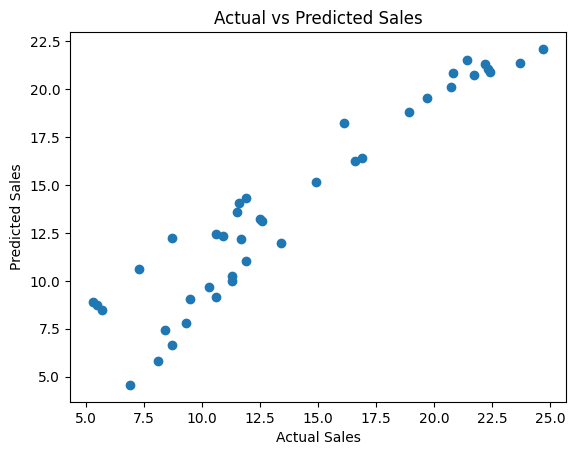

In [17]:
# Plotting Actual vs Predicted Values

plt.scatter(y_test,y_pred)
# plt.plot(y_test,y_pred,color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

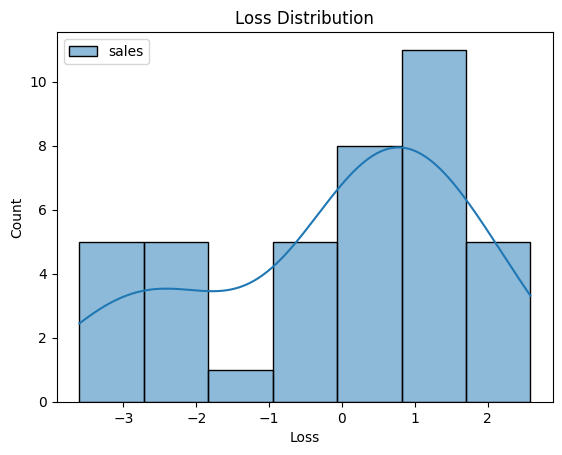

In [18]:
#Loss Function
Loss = y_test - y_pred
sns.histplot(Loss,kde=True)
plt.xlabel('Loss')
plt.title('Loss Distribution')
plt.show()